<center> <h1 style="background-color:seagreen; color:white" > <br>Análise e Visualização dos Dados da Relação de Empreendimentos de Geração Distribuída Fotovoltaica no Brasil (2009-2024)<br></h1></center> 

<center> <h4 style="background-color:DarkKhaki; color:white" > <br>Análise e Visualização dos dados da relação de empreendimentos de Geração Distribuída Fotovoltaica no Brail disponibilizado pela Aneel - (Agência Nacional de Energia Elétrica) <br></h4></center> 

A Resolução Normativa ANEEL no 482/2012, em vigor desde 17 de abril de 2012, permitiu aos consumidores brasileiros a geração própria de energia elétrica a partir de fontes renováveis ou cogeração qualificada. Este novo modelo, denominado Geração Distribuída de Energia, possibilita que residências, empresas e indústrias se tornem geradoras de energia, podendo inclusive fornecer o excedente para a rede de distribuição local. As unidades consumidoras estão localizadas próximas às geradoras, reduzindo a sobrecarga no sistema de transmissão, e em algumas modalidades, unidades de consumo distantes também podem se beneficiar da energia gerada. A geração distribuída consiste em pequenas unidades geradoras localizadas próximas ao local de consumo, utilizando fontes de energia renováveis. Essa abordagem representa uma alternativa à geração centralizada, que envolve grandes usinas distantes dos centros consumidores.

O Dataset trata de dados referentes aos micro e minigeradores distribuídos, abrangidos pela Resolução Normativa nº 482/2012. A relação dos empreendimentos é classificada pelas variáveis que compõem sua identificação, quais sejam:

<ul>
    <li>Distribuidora conectada;</li>
    <li>Código do empreendimento; </li>
    <li>Núcleo numérico do código do empreendimento; </li>
    <li>Nome do titular; </li>
    <li>Classe de produção; </li>
    <li>Subgrupo; </li>
    <li>Quantidade de unidades consumidoras que recebem os créditos;</li>
    <li>Data da conexão;</li>
    <li>Tipo de unidade produtora;</li>
    <li>Fonte;</li>
    <li>Potência instalada;</li>
    <li>Município e unidade de federação onde está localizada. </li>
</ul>

Os dados são expressos em quantidades e potência instalada em kW (quilowatt). A quantidade corresponde ao número de micro ou minigeradores distribuídos instalados no período especificado. A potência instalada é definida pelo somatório da potência elétrica ativa nominal das unidades geradoras.

A unidade de energia elétrica atualmente utilizada pela ANEEL é o kWh (quilowatt-hora) ou o MWh (megawatt-hora).



In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")


### Carregando a base de dados

In [62]:
df = pd.read_csv("empreendimento-gd-informacoes-tecnicas-fotovoltaica.csv")

In [63]:
df.head()

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor
0,1,2024-01-30T00:00:00,GD.MG.000.010.856,"18,00","2,34",risen,b&b,2017-05-30T00:00:00,"2,34","2,34",9,,
1,2,2024-01-30T00:00:00,GD.RS.000.010.924,"23,28","3,00",Canadian Solar,Fronius,2017-05-11T00:00:00,"3,20","3,00",10,CS6X-320P,Primo 3.0-1
2,3,2024-01-30T00:00:00,GD.SP.000.010.974,"24,00","3,00",CSUN,AP SYSTEMS,2017-05-19T00:00:00,"3,72","3,00",12,CSUN -72P 310 KW,YC500
3,4,2024-01-30T00:00:00,GD.RS.000.010.988,"21,56","3,63",SunEdison,Fronius,2017-05-24T00:00:00,"3,63","4,00",11,SE-F330BMC34,Primo 4.0-1
4,5,2024-01-30T00:00:00,GD.SP.000.011.006,"14,40","2,38",Canadian,Fronius,2017-05-18T00:00:00,"2,38","2,50",9,CS6P 265 Wp,Galvo 2.5


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346000 entries, 0 to 345999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   _id                      346000 non-null  int64 
 1   DatGeracaoConjuntoDados  346000 non-null  object
 2   CodGeracaoDistribuida    346000 non-null  object
 3   MdaAreaArranjo           346000 non-null  object
 4   MdaPotenciaInstalada     346000 non-null  object
 5   NomFabricanteModulo      345998 non-null  object
 6   NomFabricanteInversor    346000 non-null  object
 7   DatConexao               346000 non-null  object
 8   MdaPotenciaModulos       346000 non-null  object
 9   MdaPotenciaInversores    346000 non-null  object
 10  QtdModulos               346000 non-null  int64 
 11  NomModeloModulo          345998 non-null  object
 12  NomModeloInversor        345970 non-null  object
dtypes: int64(2), object(11)
memory usage: 34.3+ MB


<center> <h1 style="background-color:seagreen; color:white" > <br>Descrição dos atribultos da tabela <br></h1></center> 


| **Nome do Campo**  | **Tipo do dado** | **Tamanho do Campo** | **Descrição** |
| -------------------| -----------------| ---------------------| --------------|
| DatGeracaoConjuntoDados | Data Simples |  |  Data do processamento de carga automática no momento da geração para publicação do conjunto de dados abertos. |
| CodGeracaoDistribuida | Cadeia de caracteres | 21 | Código da Unidade Geradora |
| MdaAreaArranjo | Numérico | 8,2  | Total da área de Arranjo |
| MdaPotenciaInstalada  | Numérico  | 6,2 |  Medida da potência instalada |
| NomFabricanteModulo | Cadeia de caracteres | 100 | Nome do fabricante do módulo |
| NomFabricanteInversor  | Cadeia de caracteres | 100 | Nome do fabricante do inversor |
| DatConexao | Data Simples |  | Data da conexão da Unidade Geradora |
| MdaPotenciaModulos | Numérico | 6,2 | Armazena os dados expressos em quantidades e potência dos módulos em MW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída |
| MdaPotenciaInversores | Numérico | 6,2 | Armazena os dados expressos em quantidades e potência dos inversores em MW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída |
| QtdModulos | Numérico | 10 | Quantidade de Módulos |
| NomModeloModulo |  Cadeia de caracteres | 100 | Nome do modelo do Módulo |
| NomModeloInversor | Cadeia de caracteres | 100 | Nome do modelo do Inversor |


<center> <h1 style="background-color:seagreen; color:white" > <br>Análise Exploratória de Dados <br></h1></center> 

<center> <h3 style="background-color:#868661; color:white" > <br>Tratamento dos dados numéricos <br></h3></center>


Convertendo os dados numericos para a notação que a linguagem de programação entenda, para isso é necessário substituir a virgula por ponto e depois converter a informação que antes erá uma string python para um valor numérico, para esse processo foi usado o método **.aplly()** além disso, usou-se o método array do NumPy para converter os dados em numéricos float32.

Colunas convertidas: 

<ul>
    <li>MdaAreaArranjo</li>
    <li>MdaPotenciaInstalada</li>
    <li>MdaPotenciaModulos</li>
    <li>MdaPotenciaInversores</li>
</ul>


Antes:
`18,00` String

Depois:
`18.00` float32


In [65]:
df["MdaAreaArranjo"] = np.array(df["MdaAreaArranjo"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaInstalada"] = np.array(df["MdaPotenciaInstalada"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaModulos"] = np.array(df["MdaPotenciaModulos"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["MdaPotenciaInversores"] = np.array(df["MdaPotenciaInversores"].apply(lambda x: x.replace(",", ".")), dtype="float32")
df["QtdModulos"] = np.array(df["QtdModulos"].apply(lambda x: float(x)), dtype="float32")

<center> <h3 style="background-color:#868661; color:white" > <br>Convertendo as colunas de data para o tipo <strong>datitime</strong> do pandas <br></h3></center>

Para realizar essa conversão usa-se o método `.to_datitime()`, as colunas `DatGeracaoConjuntoDados`e `DatConexao` serão convertidas para esse formato.

In [66]:
df["DatGeracaoConjuntoDados"] = pd.to_datetime(df["DatGeracaoConjuntoDados"])
df["DatConexao"] = pd.to_datetime(df["DatConexao"])

<center> <h3 style="background-color:#868661; color:white" > <br>Criando atribultos Ano, Mês e Dia <br></h3></center>

In [67]:
df["Year"] = df["DatConexao"].apply(lambda x: x.year)
df["Month"] = df["DatConexao"].apply(lambda x: x.month)
df["Day"] = df["DatConexao"].apply(lambda x: x.day)

In [68]:
df.head(-1)

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
0,1,2024-01-30,GD.MG.000.010.856,18.000000,2.34,risen,b&b,2017-05-30,2.34,2.34,9.0,,,2017,5,30
1,2,2024-01-30,GD.RS.000.010.924,23.280001,3.00,Canadian Solar,Fronius,2017-05-11,3.20,3.00,10.0,CS6X-320P,Primo 3.0-1,2017,5,11
2,3,2024-01-30,GD.SP.000.010.974,24.000000,3.00,CSUN,AP SYSTEMS,2017-05-19,3.72,3.00,12.0,CSUN -72P 310 KW,YC500,2017,5,19
3,4,2024-01-30,GD.RS.000.010.988,21.559999,3.63,SunEdison,Fronius,2017-05-24,3.63,4.00,11.0,SE-F330BMC34,Primo 4.0-1,2017,5,24
4,5,2024-01-30,GD.SP.000.011.006,14.400000,2.38,Canadian,Fronius,2017-05-18,2.38,2.50,9.0,CS6P 265 Wp,Galvo 2.5,2017,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345994,345995,2024-01-30,GD.TO.000.353.296,36.480000,6.84,CANADIAN SOLAR,SOFAR SOLAR,2020-07-14,6.84,7.50,19.0,CS3U 360P,SOFAR 7.5KTLM,2020,7,14
345995,345996,2024-01-30,GD.TO.000.353.364,80.000000,10.00,JINKO SOLAR,PHB SOLAR,2020-07-08,13.20,10.00,40.0,JKM330PP-72,D-NS PHB5000D-NS,2020,7,8
345996,345997,2024-01-30,GD.TO.000.353.396,35.639999,5.00,BYD,GROWATT,2020-07-20,6.03,5.00,18.0,335 PHK-36,5000MTL-US,2020,7,20
345997,345998,2024-01-30,GD.TO.000.353.432,27.580000,4.00,RISEN SOLAR,RENOVIGI,2020-07-22,4.76,4.00,14.0,RSM144-6-340P,RENO-4K PLUS,2020,7,22


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346000 entries, 0 to 345999
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   _id                      346000 non-null  int64         
 1   DatGeracaoConjuntoDados  346000 non-null  datetime64[ns]
 2   CodGeracaoDistribuida    346000 non-null  object        
 3   MdaAreaArranjo           346000 non-null  float32       
 4   MdaPotenciaInstalada     346000 non-null  float32       
 5   NomFabricanteModulo      345998 non-null  object        
 6   NomFabricanteInversor    346000 non-null  object        
 7   DatConexao               346000 non-null  datetime64[ns]
 8   MdaPotenciaModulos       346000 non-null  float32       
 9   MdaPotenciaInversores    346000 non-null  float32       
 10  QtdModulos               346000 non-null  float32       
 11  NomModeloModulo          345998 non-null  object        
 12  NomModeloInverso

<center> <h1 style="background-color:seagreen; color:white" > <br>Plotando a Distribuição de Atribultos ​​do conjunto de dados <br></h1></center> 

Esse função filtra os dados por ano, mês e dia.

In [70]:
def data_for_date(year: int, month: int = None, day: int = None):
    """
    Attributes:
        year: numeric
        month: numeric
        day: numeric
    """
    if not (month) and not (day):
        return df[df["Year"] == year]
    elif (month and (not day)):
        return df[(df["Year"] == year) & (df["Month"] == month)]
    elif (month and  day):
        return df[(df["Year"] == year) & (df["Month"] == month) & (df["Day"] == day)]


<center> <h2 style="background-color:#27AE60 ; color:white" > <br>Estratificação dos atribultos dos anos de 2017 e 2020 <br></h2></center>

In [71]:
df_datconexao_2017 = data_for_date(year=2017, month=12)
df_datconexao_2017

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
308,309,2024-01-30,GD.MG.000.012.150,20.000000,3.00,Canadian Solar,ABB,2017-12-19,3.360000,3.0,12.0,CS6K-280P,ABB PVI-3000-TL-OUTD-S,2017,12,19
351,352,2024-01-30,GD.SP.000.022.357,36.860001,6.00,Canadian Solar,Canadian Solar,2017-12-28,6.270000,6.0,19.0,CSU-330P,CSI-3K-TL,2017,12,28
789,790,2024-01-30,GD.MG.000.022.798,32.540001,5.00,Renovigi,Renovigi,2017-12-11,5.450000,5.0,20.0,RM60-6-270P,SF5KTN 5.000,2017,12,11
993,994,2024-01-30,GD.SC.000.022.796,159.100006,25.00,Jinko Solar,PHB Solar,2017-12-15,26.650000,25.0,82.0,JKM 325 PP (Plus),PHB 25K - DT,2017,12,15
1039,1040,2024-01-30,GD.SP.000.022.727,34.000000,5.00,CANADIAN SOLAR,CANADIAN SOLAR,2017-12-29,5.000000,5.0,17.0,CS6U-285P,CSI-5K-TL,2017,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227196,227197,2024-01-30,GD.PI.000.262.801,33.000000,5.00,CSI CANADIAN SOLAR INC,CANADIAN SOLAR,2017-12-20,5.600000,5.0,20.0,CS6K 280M,CSI-5K-MTL,2017,12,20
256867,256868,2024-01-30,GD.GO.000.243.339,77.279999,12.48,Canadian Solar,Fronius,2017-12-29,12.480000,12.5,48.0,CS6P260P,Fronius/ Fronius Symo 12.53M,2017,12,29
259444,259445,2024-01-30,GD.BA.000.266.274,32.169998,5.00,CANADIAN SOLAR,FRONIUS,2017-12-27,5.000000,5.4,20.0,,,2017,12,27
295967,295968,2024-01-30,GD.GO.000.285.008,570.000000,75.00,GCL,FRONIUS,2017-12-20,92.620003,75.0,285.0,GCL P6/72-325,SYMO 25.0-3-M,2017,12,20


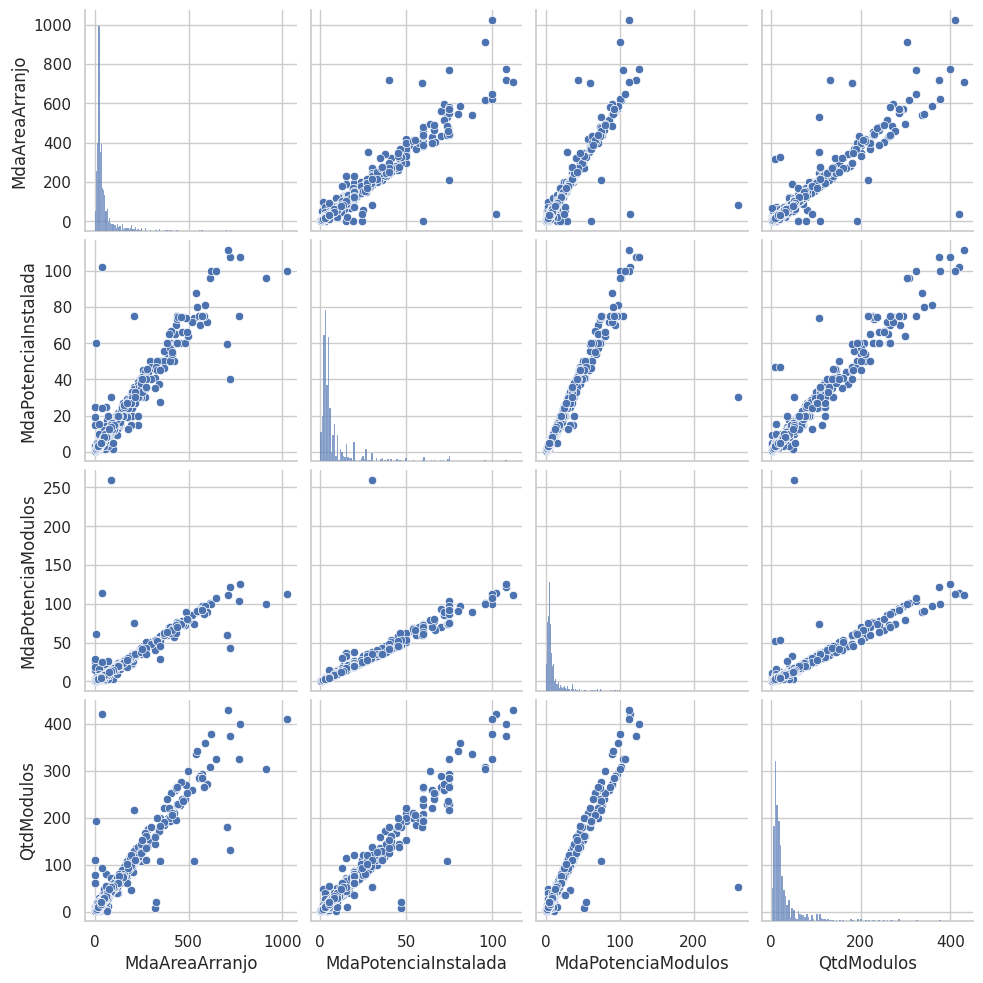

In [72]:
sns.pairplot(df_datconexao_2017[df_datconexao_2017["MdaPotenciaInstalada"] < 150],
             x_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"],
             y_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"])

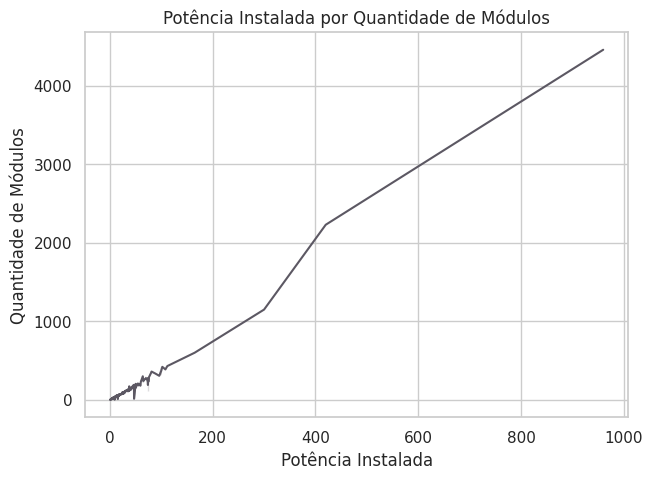

In [133]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df_datconexao_2017, x="MdaPotenciaInstalada", y="QtdModulos", color="#5c5863")
plt.title("Potência Instalada por Quantidade de Módulos")
plt.xlabel("Potência Instalada")
plt.ylabel("Quantidade de Módulos")
plt.show()

In [74]:
df_datconexao_2020 = data_for_date(year=2020, month=12)
df_datconexao_2020

,_id,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor,Year,Month,Day
5916,5917,2024-01-30,GD.PR.000.045.032,45.000000,4.54,CANADIAN/JINKO,ABB,2020-12-07,4.54,4.80,14.0,CS6U-330P 72/JKM320PP-72,UNO DM-3.3-TL,2020,12,7
11336,11337,2024-01-30,GD.PI.000.024.980,72.000000,12.00,TRINA,WEB / HUAWEI,2020-12-21,14.58,12.00,36.0,TSM-DE15M 405W,SUN2000-12KTL-M0,2020,12,21
12641,12642,2024-01-30,GD.SC.000.014.612,33.000000,5.00,Seraphim Solar,B&B Power,2020-12-09,5.00,5.00,21.0,nao informado,SF5000TL,2020,12,9
16626,16627,2024-01-30,GD.SP.000.068.697,26.600000,5.00,QCELLS,FRONIUS,2020-12-29,5.11,5.00,14.0,Q-PEAK 365,PRIMO 5.0.1,2020,12,29
19510,19511,2024-01-30,GD.SP.000.034.166,19.639999,3.24,Canadian Solar,NHS SOLAR,2020-12-18,3.24,3.90,12.0,Canadian Solar,NHS SOLAR,2020,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345946,345947,2024-01-30,GD.MG.000.366.101,66.000000,10.00,RISEN,GOODWE,2020-12-22,10.00,10.00,33.0,RSM144-6- 345P,GW5000DNS,2020,12,22
345947,345948,2024-01-30,GD.PA.000.366.167,106.000000,15.00,JINKO JKM400M-72H-V,FRONIUS PRIMO 15.0-3,2020-12-17,21.60,15.00,54.0,JINKO JKM400M-72H-V,FRONIUS PRIMO 15.0-3,2020,12,17
345948,345949,2024-01-30,GD.PE.000.380.270,24.000000,4.00,JINKO,Fronius,2020-12-21,4.80,4.00,12.0,JKM400M-72H-V,Fronius Primo 4.0-1,2020,12,21
345950,345951,2024-01-30,GD.PE.000.380.417,8.000000,1.30,CANADIAN,CR2 MAXX,2020-12-17,1.44,1.30,4.0,CS3U 360W,SUN 1300G,2020,12,17


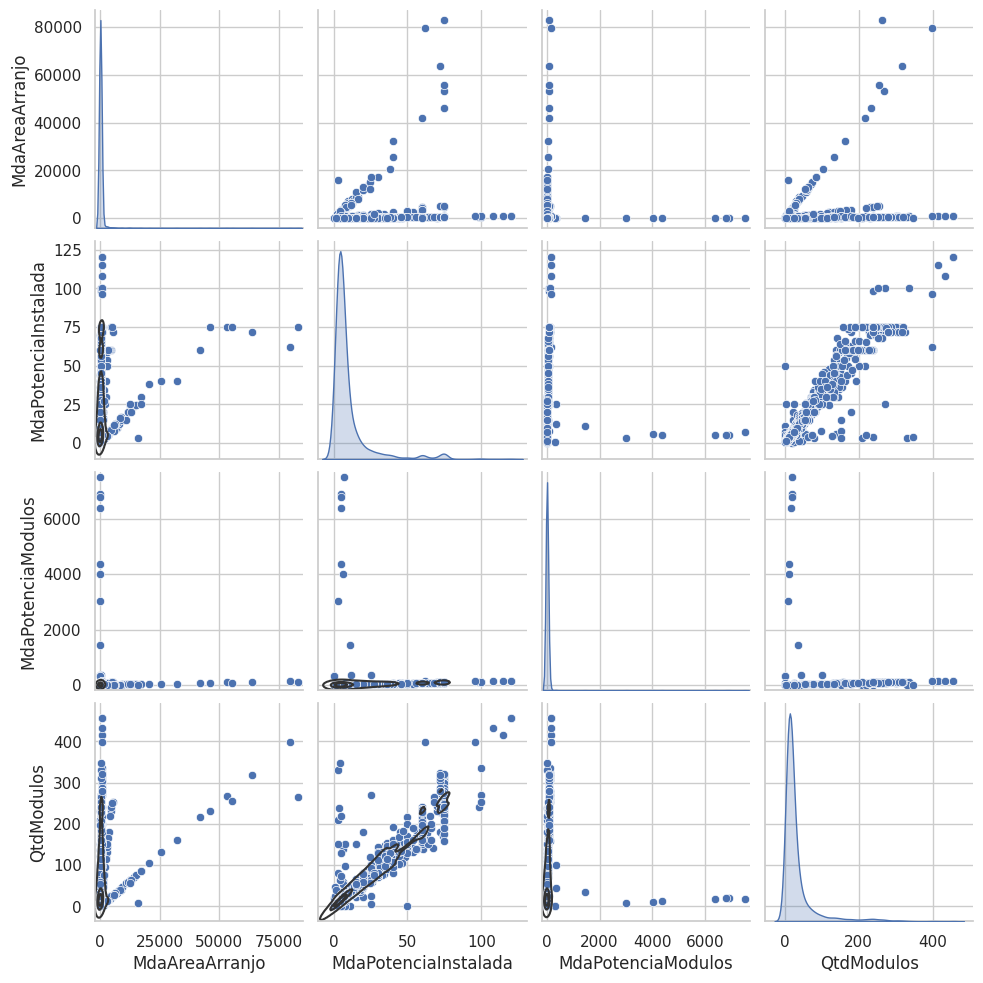

In [143]:
g = sns.pairplot(df_datconexao_2020[df_datconexao_2020["MdaPotenciaInstalada"] < 150],
                 x_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"],
                 y_vars=["MdaAreaArranjo", "MdaPotenciaInstalada", "MdaPotenciaModulos", "QtdModulos"], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

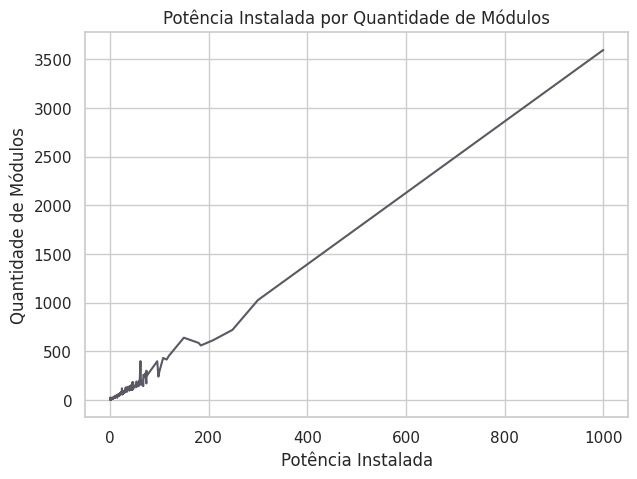

In [126]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df_datconexao_2020, x="MdaPotenciaInstalada", y="QtdModulos", color="#5c5863")
plt.title("Potência Instalada por Quantidade de Módulos")
plt.xlabel("Potência Instalada")
plt.ylabel("Quantidade de Módulos")
plt.show()

<center> <h3 style="background-color:#868661; color:white" > <br>Dados anuais do setor <br></h3></center>

In [77]:
df_datconexao_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 308 to 300887
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      1717 non-null   int64         
 1   DatGeracaoConjuntoDados  1717 non-null   datetime64[ns]
 2   CodGeracaoDistribuida    1717 non-null   object        
 3   MdaAreaArranjo           1717 non-null   float32       
 4   MdaPotenciaInstalada     1717 non-null   float32       
 5   NomFabricanteModulo      1717 non-null   object        
 6   NomFabricanteInversor    1717 non-null   object        
 7   DatConexao               1717 non-null   datetime64[ns]
 8   MdaPotenciaModulos       1717 non-null   float32       
 9   MdaPotenciaInversores    1717 non-null   float32       
 10  QtdModulos               1717 non-null   float32       
 11  NomModeloModulo          1717 non-null   object        
 12  NomModeloInversor        1717 non-n


**Medida da potência instalada**

In [78]:
def info_generation(df_datconexao):
    soma_potencia = df_datconexao["MdaPotenciaInstalada"].sum()
    media_potencia_inst = df_datconexao["MdaPotenciaInstalada"].mean()
    qt_instalacao_ano = df_datconexao["DatConexao"].count()
    qt_fabricante_inversores_ano = df_datconexao["NomFabricanteInversor"].nunique()

    data = {"soma_potencia": soma_potencia,
             "media_potencia_inst": media_potencia_inst,
             "qt_instalacao_ano": qt_instalacao_ano,
             "qt_fabricante_inversores_ano": qt_fabricante_inversores_ano}

    return data


<center> <h3 style="background-color:#868661; color:white" > <br>Informação de sistemas fotovoltaicos anuais<br></h3></center>

In [79]:
arrays = [[], [], [], [], []]

for ano in np.sort(df["Year"].unique()):
    data = info_generation(data_for_date(year=ano))
    arrays[0].append(ano)
    arrays[1].append(data["soma_potencia"])
    arrays[2].append(data["media_potencia_inst"])
    arrays[3].append(data["qt_instalacao_ano"])
    arrays[4].append(data["qt_fabricante_inversores_ano"])
info_anual = pd.DataFrame(np.transpose(arrays),
                          columns=["ano", "soma_potencia", "media_potencia_inst",
                                   "qt_instalacao_ano", "qt_fabricante_inversores_ano"])
info_anual["ano"] = info_anual["ano"].apply(lambda x: int(x))
info_anual.head(20)

,ano,soma_potencia,media_potencia_inst,qt_instalacao_ano,qt_fabricante_inversores_ano
0,2009,8.200000e+00,8.200000,1.0,1.0
1,2010,6.000000e+00,6.000000,1.0,1.0
2,2011,5.000000e+00,5.000000,1.0,1.0
3,2012,4.498000e+02,89.959999,5.0,5.0
4,2013,1.299070e+03,33.309486,39.0,24.0
5,2014,2.442310e+03,9.079220,269.0,79.0
6,2015,1.002107e+04,7.890606,1270.0,201.0
7,2016,4.748386e+04,7.550303,6289.0,511.0
8,2017,1.180928e+05,9.192245,12847.0,884.0
9,2018,3.798222e+05,11.355602,33448.0,2013.0


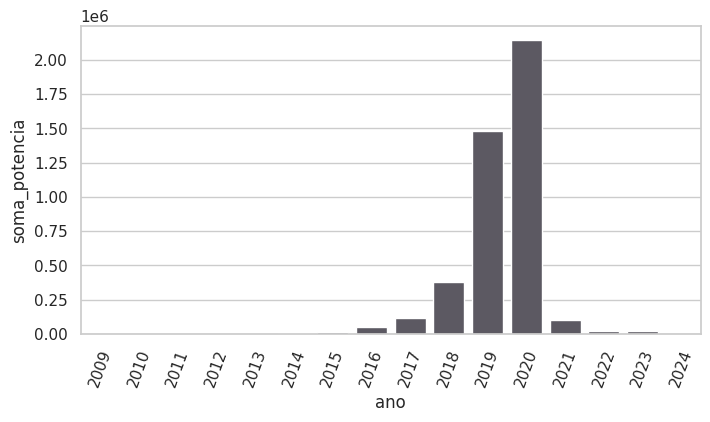

In [139]:
plt.figure(figsize=(8, 4))
sns.barplot(data=info_anual, x="ano", y="soma_potencia", color="#5c5863")
plt.xticks(rotation=70)
plt.show()

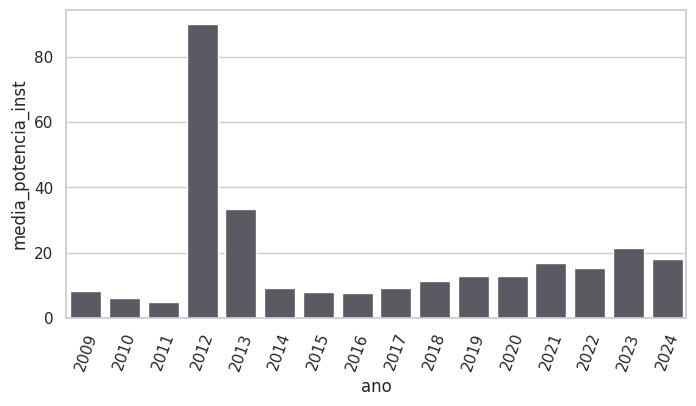

In [140]:
plt.figure(figsize=(8, 4))
sns.barplot(data=info_anual, x="ano", y="media_potencia_inst", color="#5c5863")
plt.xticks(rotation=70)
plt.show()

**Análise do ano de `2012`**

Podemos observar um valor alto com relação a média anual no ano de 2012, isso ocorre por conta da quantidade de instalaççoes no ano ter cido pequena e em uma delas o valor foi relativamente grande, dessa forma ao calcular a média se obtem uma média alta.


In [82]:
print("Média de potencia instalada em 2012: ", df[df["Year"] == 2012]["MdaPotenciaInstalada"].mean(), "Kw")
df[df["Year"] == 2012]["MdaPotenciaInstalada"]

Média de potencia instalada em 2012:  89.96 Kw


1346        6.8
10660     403.0
31780      10.0
107542     27.0
140198      3.0
Name: MdaPotenciaInstalada, dtype: float32

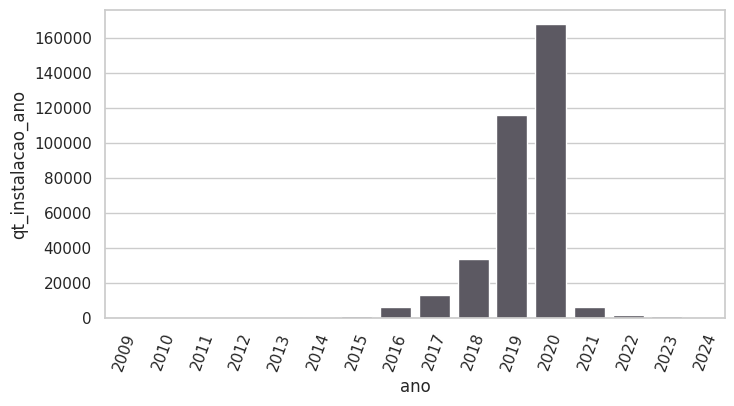

In [141]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=info_anual, x="ano", y="qt_instalacao_ano", color="#5c5863")
plt.xticks(rotation=70)
plt.show()

ano mes

In [84]:
arrays = [[], [], [], [], []]

for ano in np.sort(df["Year"].unique()):
    for mes in np.sort(df["Month"].unique()):
        data = info_generation(data_for_date(year=ano, month=mes))
        arrays[0].append(f"{ano}-{mes}")
        arrays[1].append(data["soma_potencia"])
        arrays[2].append(data["media_potencia_inst"])
        arrays[3].append(data["qt_instalacao_ano"])
        arrays[4].append(data["qt_fabricante_inversores_ano"])
info_mensal = pd.DataFrame(np.transpose(arrays),
                          columns=["date", "soma_potencia_mes", "media_potencia_inst_mes",
                                   "qt_instalacao_mes", "qt_fabricante_inversores__mes"])

info_mensal["soma_potencia_mes"] = info_mensal["soma_potencia_mes"].astype(np.float32)
info_mensal["media_potencia_inst_mes"] = info_mensal["media_potencia_inst_mes"].astype(np.float32)
info_mensal["qt_instalacao_mes"] = info_mensal["qt_instalacao_mes"].astype(np.float32)
info_mensal["qt_fabricante_inversores__mes"] = info_mensal["qt_fabricante_inversores__mes"].astype(np.float32)

info_mensal["date"] = pd.to_datetime(info_mensal["date"])
info_mensal.head(150)

,date,soma_potencia_mes,media_potencia_inst_mes,qt_instalacao_mes,qt_fabricante_inversores__mes
0,2009-01-01,0.000000,NaN,0.0,0.0
1,2009-02-01,0.000000,NaN,0.0,0.0
2,2009-03-01,0.000000,NaN,0.0,0.0
3,2009-04-01,0.000000,NaN,0.0,0.0
4,2009-05-01,0.000000,NaN,0.0,0.0
...,...,...,...,...,...
145,2021-02-01,14751.509766,12.101320,1219.0,141.0
146,2021-03-01,24552.648438,209.851700,117.0,51.0
147,2021-04-01,877.640015,13.502154,65.0,33.0
148,2021-05-01,1020.730103,13.256235,77.0,42.0


In [85]:
def dados_por_ano(data_inicio, data_fim):
    dado = pd.DataFrame(info_mensal[(info_mensal["date"] >= data_inicio) & (info_mensal["date"] <= data_fim)])
    dado["mes"] = info_mensal["date"].apply(lambda x: x.month)
    dado = dado.reset_index()
    return dado

dados_por_ano("2017-1-1", "2017-12-1")

,index,date,soma_potencia_mes,media_potencia_inst_mes,qt_instalacao_mes,qt_fabricante_inversores__mes,mes
0,96,2017-01-01,4329.670410,6.972094,621.0,98.0,1
1,97,2017-02-01,4466.480469,7.056051,633.0,111.0,2
2,98,2017-03-01,6077.569824,7.448002,816.0,113.0,3
3,99,2017-04-01,6002.030273,9.363542,641.0,95.0,4
4,100,2017-05-01,9278.500000,10.628293,873.0,140.0,5
5,101,2017-06-01,8201.509766,7.886067,1040.0,157.0,6
6,102,2017-07-01,8146.060059,7.549639,1079.0,164.0,7
7,103,2017-08-01,12647.669922,9.654710,1310.0,179.0,8
8,104,2017-09-01,12275.429688,10.786845,1138.0,184.0,9
9,105,2017-10-01,12677.110352,10.061198,1260.0,186.0,10


In [86]:
data_inicio = []
data_fim = []
for i in range(2009, 2025):
    data_inicio.append(f"{i}-1-1")
    data_fim.append(f"{i}-12-1")

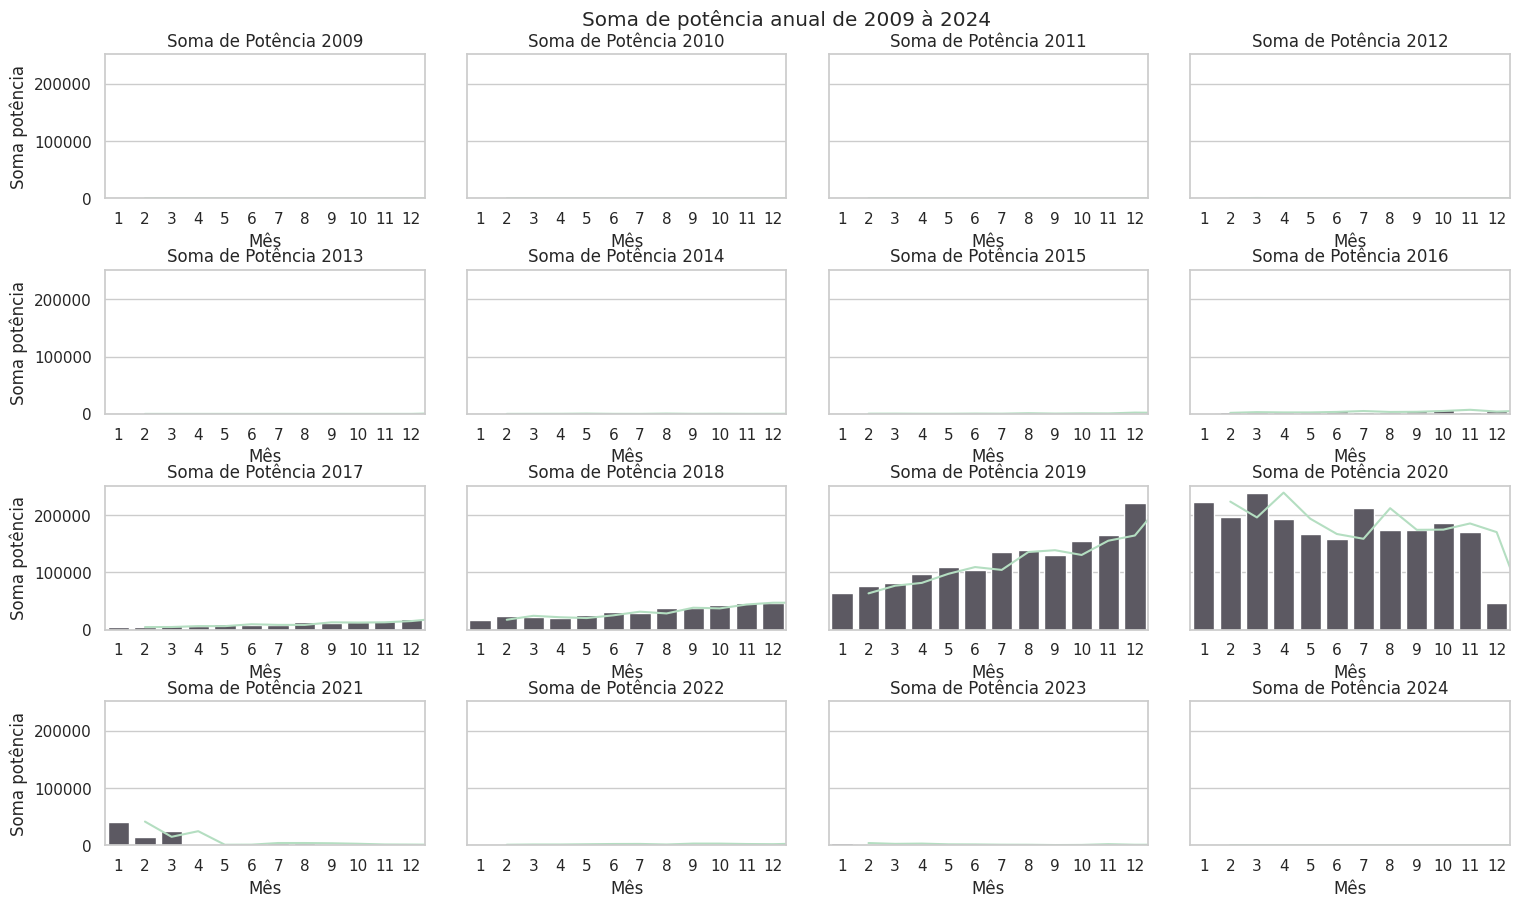

In [138]:
fig, axes = plt.subplots(4, 4, figsize=(15, 9), sharey=True)
fig.suptitle('Soma de potência anual de 2009 à 2024 ')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, top=0.93)

cont = 0
for i in range(4):
    for f in range(4):
        dados_ano = dados_por_ano(data_inicio=data_inicio[cont], data_fim=data_fim[cont])
        sns.lineplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["soma_potencia_mes"], color="#b4dec1")
        sns.barplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["soma_potencia_mes"], color="#5c5863")
        axes[i, f].set_title(f"Soma de Potência {data_inicio[cont][:4]}")
        axes[i, f].set(xlabel="Mês", ylabel="Soma potência")
        cont += 1

plt.show()

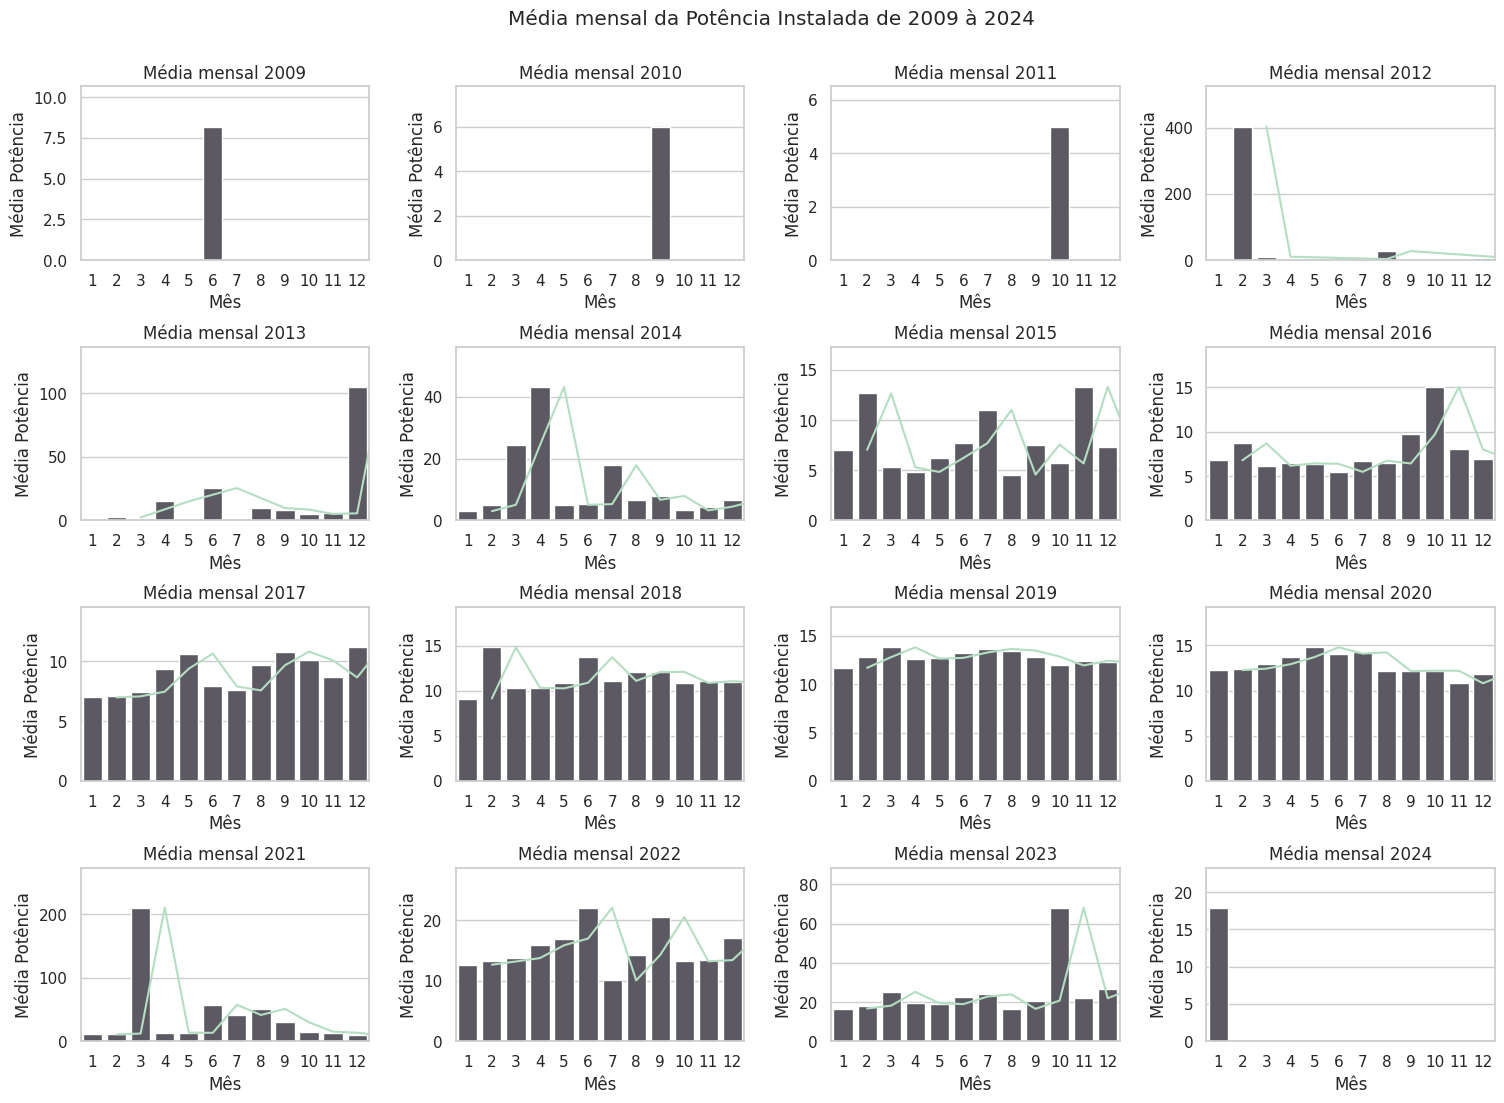

In [153]:
fig, axes = plt.subplots(4, 4, figsize=(15, 11))
fig.suptitle('Média mensal da Potência Instalada de 2009 à 2024 ')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.91)

cont = 0
for i in range(4):
    for f in range(4):
        dados_ano = dados_por_ano(data_inicio=data_inicio[cont], data_fim=data_fim[cont])
        sns.lineplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["media_potencia_inst_mes"], color="#b4dec1")
        sns.barplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["media_potencia_inst_mes"], color="#5c5863")
        axes[i, f].set_title(f"Média mensal {data_inicio[cont][:4]}")
        axes[i, f].set(xlabel="Mês", ylabel="Média Potência")
        axes[i, f].set_ylim(0, 1.3*dados_ano["media_potencia_inst_mes"].max())
        cont += 1

plt.show()

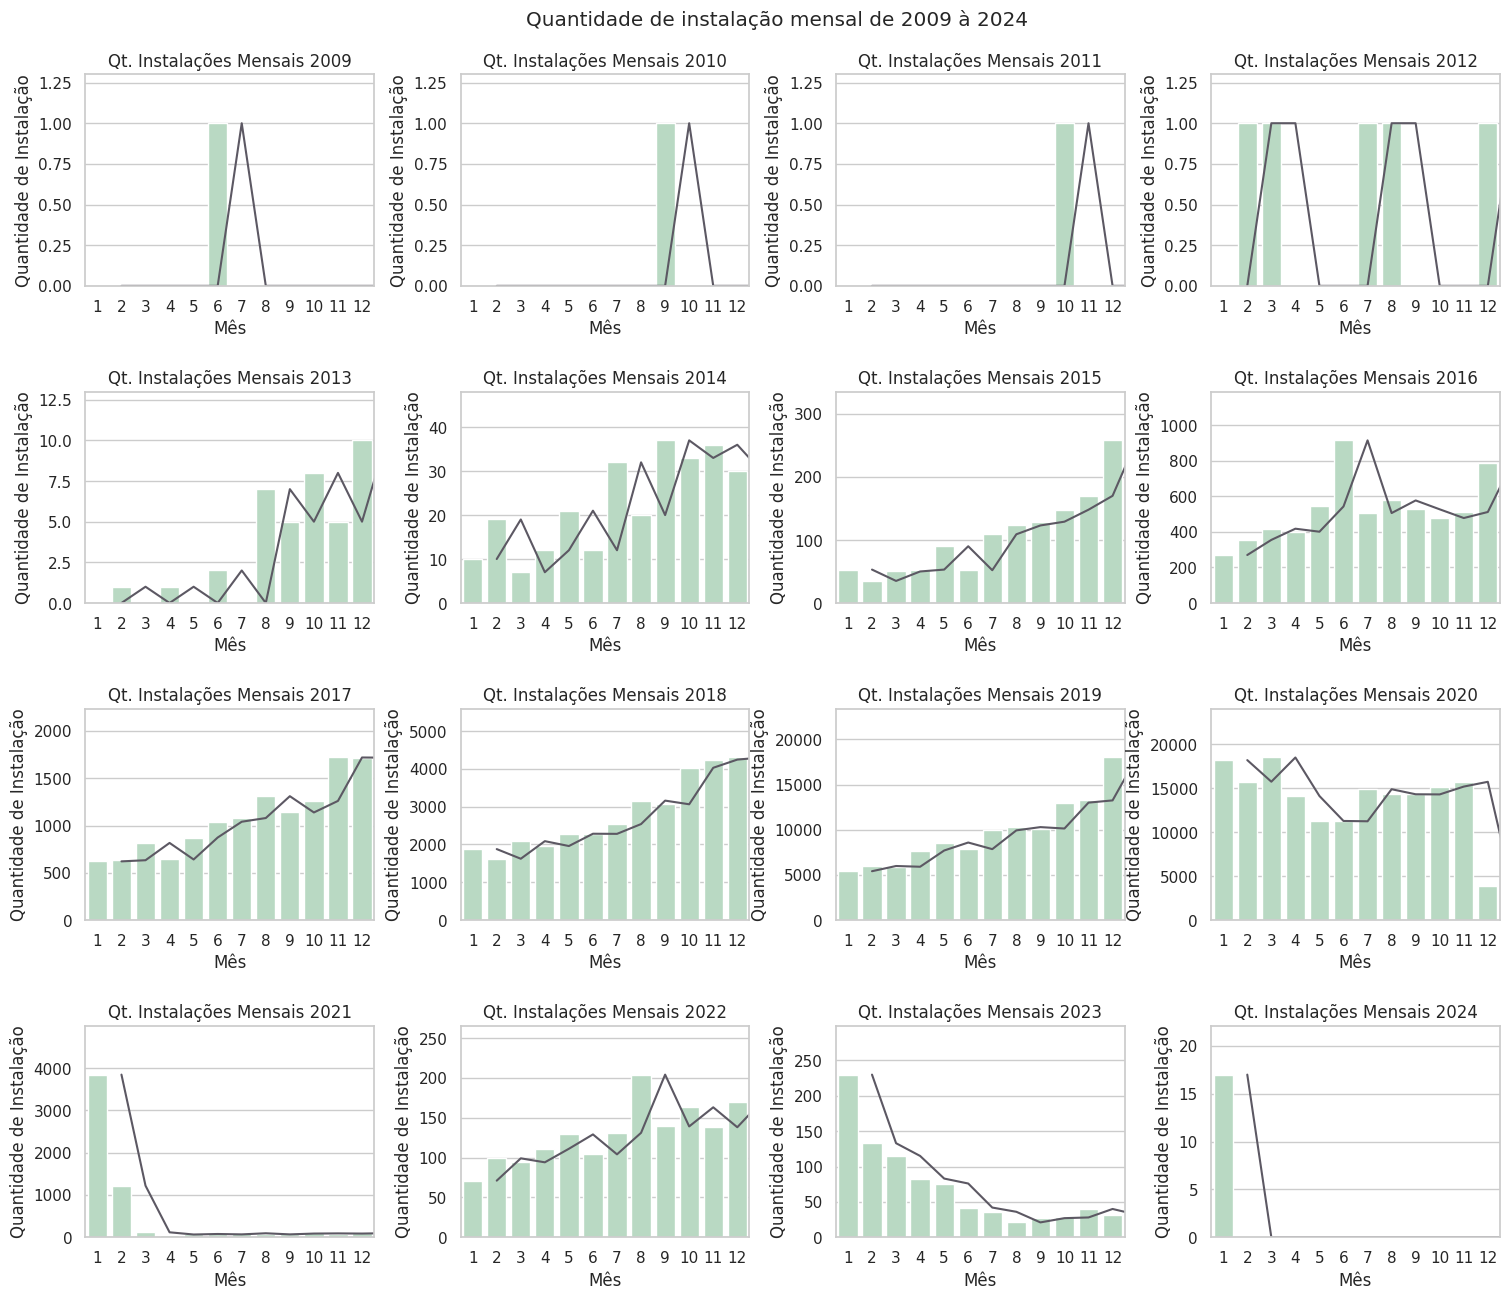

In [148]:
fig, axes = plt.subplots(4, 4, figsize=(15, 13))
fig.suptitle('Quantidade de instalação mensal de 2009 à 2024 ')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.93)

cont = 0
for i in range(4):
    for f in range(4):
        dados_ano = dados_por_ano(data_inicio=data_inicio[cont], data_fim=data_fim[cont])
        sns.lineplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["qt_instalacao_mes"], color="#5c5863")
        sns.barplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["qt_instalacao_mes"], color="#b4dec1")
        axes[i, f].set_title(f"Qt. Instalações Mensais {data_inicio[cont][:4]}")
        axes[i, f].set(xlabel="Mês", ylabel="Quantidade de Instalação")
        axes[i, f].set_ylim(0, 1.3*dados_ano["qt_instalacao_mes"].max())
        cont += 1

plt.show()

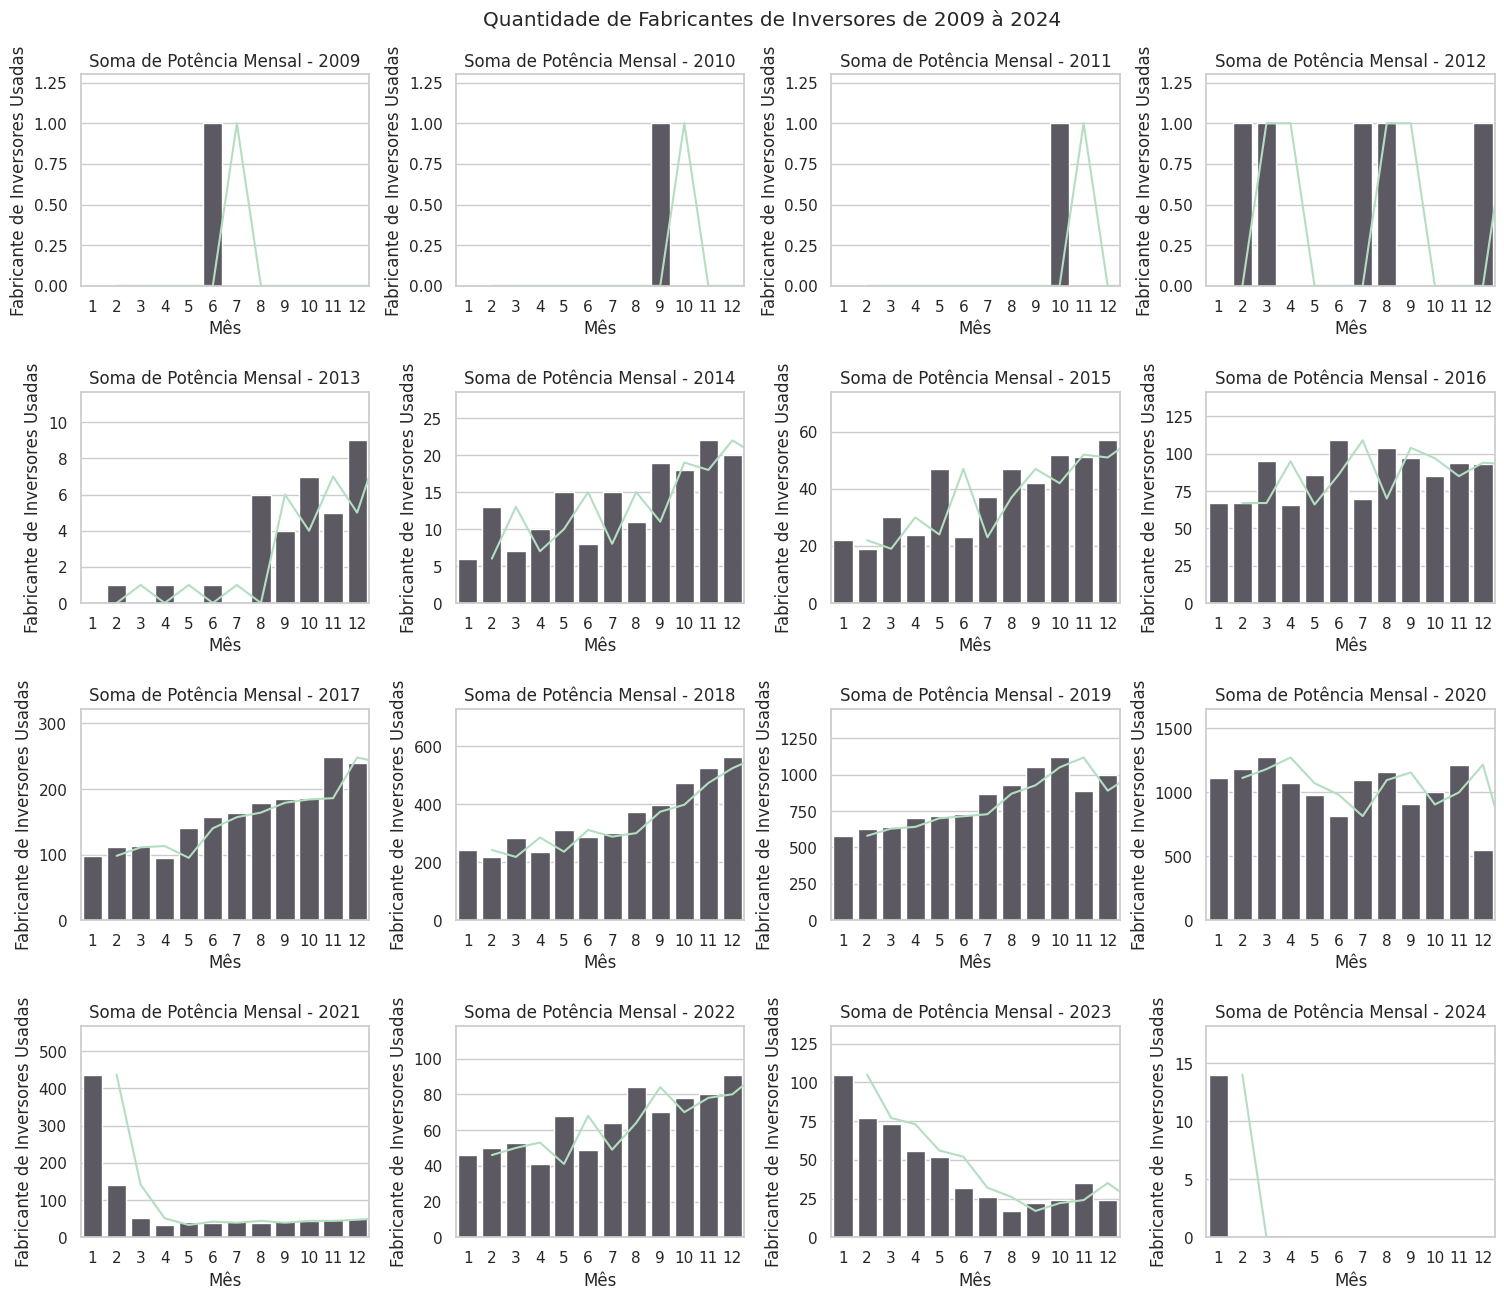

In [147]:
fig, axes = plt.subplots(4, 4, figsize=(15, 13))
fig.suptitle('Quantidade de Fabricantes de Inversores de 2009 à 2024 ')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.93)

cont = 0
for i in range(4):
    for f in range(4):
        dados_ano = dados_por_ano(data_inicio=data_inicio[cont], data_fim=data_fim[cont])
        sns.lineplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["qt_fabricante_inversores__mes"], color="#b4dec1")
        sns.barplot(ax=axes[i, f], x=dados_ano["mes"], y=dados_ano["qt_fabricante_inversores__mes"], color="#5c5863")
        axes[i, f].set_title(f"Soma de Potência Mensal - {data_inicio[cont][:4]}")
        axes[i, f].set(xlabel="Mês", ylabel="Fabricante de Inversores Usadas")
        axes[i, f].set_ylim(0, 1.3*dados_ano["qt_fabricante_inversores__mes"].max())
        cont += 1

plt.show()